# Analysis of U.S. Dept of Labor Reports

Source of data is comma separated values from this website:

https://oui.doleta.gov/unemploy/DataDownloads.asp




In [1]:
%matplotlib inline

In [ ]:
!pwd

In [4]:
!ls -al

total 4112
drwxrwxr-x  3 tap3w0rm tap3w0rm    4096 Jan 24 17:04 .
drwxr-xr-x 10 tap3w0rm tap3w0rm    4096 Jan 24 12:31 ..
-rw-rw-r--  1 tap3w0rm tap3w0rm    4580 Jan 24 17:04 01_mt_labor_analysis.ipynb
-rw-rw-r--  1 tap3w0rm tap3w0rm 4186572 Jan 23 15:21 ar9050.csv
drwxrwxr-x  2 tap3w0rm tap3w0rm    4096 Jan 24 12:32 .ipynb_checkpoints


## Analysis of First Payment Time Lapse

ETA 9050 

General Descption:

The ETA 9050 report contains monthly information on first payment time lapse. This report concerns the time it takes States to pay benefits to claimants for the first compensable week of unemployment. Similar time lapse data were formerly reported in Section C of the ETA 5159 report. That data addressed first payment time lapse for total unemployment only. This report contains monthly time lapse data for all first payments, i.e., total, partial and part-total. A separate section of this report is reserved for Workshare (Short-Time Compensation) first payments only. Workshare will be reported separately and is excluded from that part of the report for "ALL" first payments.


First collect the data files.

In [3]:
!wget https://oui.doleta.gov/unemploy/csv/ar9050.csv

--2022-01-24 17:01:27--  https://oui.doleta.gov/unemploy/csv/ar9050.csv
Resolving oui.doleta.gov (oui.doleta.gov)... 2607:f250:d020:3005:152:180:11:53f, 152.180.11.53
Connecting to oui.doleta.gov (oui.doleta.gov)|2607:f250:d020:3005:152:180:11:53f|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4186572 (4.0M) [text/csv]
Saving to: ‘ar9050.csv’

ar9050.csv          100%[===================>]   3.99M   565KB/s    in 6.7s    

2022-01-24 17:01:34 (614 KB/s) - ‘ar9050.csv’ saved [4186572/4186572]



In [6]:
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import time
import matplotlib.pyplot as plt
import numpy as np
from numpy import float64, int64

In [7]:
df_eta9050_xwa = pd.read_csv('ar9050.csv')

In [8]:
df_eta9050_xwa.head()

st    rptdate    c1    c2   c3  c4    c5    c6  c7  c8  ...  c87  c88  c89  \
0  AK  1/31/1997  5894  5694  163  37  1233  1175  57   1  ...    0    0   22   
1  AK  2/28/1997  4316  4161  126  29   663   608  54   1  ...    2    0   77   
2  AK  3/31/1997  3030  2946   57  27   426   401  23   2  ...    0    0   68   
3  AK  4/30/1997  3559  3443   95  21   561   541  19   1  ...    0    0   50   
4  AK  5/31/1997  2543  2437   91  15   466   447  18   1  ...    0    0   38   

   c90  c91  c92  c93  c94  c95  c96  
0   21    1    0   14   10    4    0  
1   72    5    0   14   12    2    0  
2   68    0    0    6    6    0    0  
3   49    0    1   12   10    2    0  
4   36    2    0    2    1    1    0  

[5 rows x 98 columns]

In [9]:
df_eta9050_xwa.dtypes

st         object
rptdate    object
c1          int64
c2          int64
c3          int64
            ...  
c92         int64
c93         int64
c94         int64
c95         int64
c96         int64
Length: 98, dtype: object

In [11]:
#count the number of rows in the index column
print(len(df_eta9050_xwa.index))

15870


In [12]:
df_eta9050_xwa.describe()

c1            c2            c3            c4            c5  \
count  1.587000e+04  1.587000e+04  15870.000000  15870.000000  15870.000000   
mean   1.315255e+04  1.301348e+04     63.834026     75.225142    415.205041   
std    2.947262e+04  2.938089e+04    121.020131    112.440429    638.294494   
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
25%    2.572250e+03  2.530250e+03     12.000000     11.000000    115.000000   
50%    6.220500e+03  6.134500e+03     30.000000     36.000000    250.000000   
75%    1.482675e+04  1.462000e+04     69.000000     85.000000    526.000000   
max    1.996481e+06  1.995721e+06   3724.000000   1543.000000  32738.000000   

                 c6            c7            c8             c9            c10  \
count  15870.000000  15870.000000  15870.000000   15870.000000   15870.000000   
mean     407.441336      5.704474      2.058412    6844.625016    6776.585696   
std      632.738346     16.704434      6.136088   11558.537910   11502.807492   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%      111.000000      0.000000      0.000000    1394.000000    1374.000000   
50%      244.000000      2.000000      0.000000    3316.000000    3268.500000   
75%      516.000000      6.000000      2.000000    7563.750000    7477.500000   
max    32734.000000   1468.000000    211.000000  364045.000000  364030.000000   

       ...           c87           c88            c89            c90  \
count  ...  15870.000000  15870.000000   15870.000000   15870.000000   
mean   ...      0.058412      0.010775     321.174669     317.642974   
std    ...      0.281652      0.108600    1883.217561    1876.274742   
min    ...      0.000000      0.000000       0.000000       0.000000   
25%    ...      0.000000      0.000000      14.000000      13.000000   
50%    ...      0.000000      0.000000      53.000000      52.000000   
75%    ...      0.000000      0.000000     191.000000     188.000000   
max    ...      7.000000      3.000000  115111.000000  114998.000000   

                c91           c92           c93           c94           c95  \
count  15870.000000  15870.000000  15870.000000  15870.000000  15870.000000   
mean       2.173724      1.357782     14.545936     14.187650      0.293321   
std        5.781756      6.193899     59.955265     59.397922      0.904878   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      1.000000      1.000000      0.000000   
50%        0.000000      0.000000      5.000000      4.000000      0.000000   
75%        2.000000      1.000000     13.000000     13.000000      0.000000   
max      245.000000    438.000000   4846.000000   4801.000000     21.000000   

                c96  
count  15870.000000  
mean       0.064965  
std        0.370303  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       24.000000  

[8 rows x 96 columns]

In [28]:
usecols = ['st', 'rptdate', 'c1', 'c5']

In [33]:
usecols = ['st',
'rptdate',
'c1',
'c5',
'c9',
'c13',
'c17',
'c20',
'c25',
'c29',
'c33',
'c37',
'c41',
'c44',
'c49',
'c53',
'c57',
'c61',
'c65',
'c69',
'c73',
'c77',
'c81',
'c84',
'c89',
'c93']

In [49]:
df_eta9050_xwa = pd.read_csv('ar9050.csv', usecols=usecols, header=0,
                            parse_dates=['rptdate'])

In [50]:
df_eta9050_xwa.head()

st    rptdate    c1    c5    c9  c13   c17  c20  c25  c29  ...  c57  c61  \
0  AK 1997-01-31  5894  1233  3538  147  1655    9  426  311  ...   26   13   
1  AK 1997-02-28  4316   663  2130   92  1403   12  392  142  ...   20    8   
2  AK 1997-03-31  3030   426  1505   64   937    9  297   96  ...   12    3   
3  AK 1997-04-30  3559   561  1931  126  1116    7  295  107  ...    9    3   
4  AK 1997-05-31  2543   466  1319  134   839    4  218   87  ...    9    2   

   c65  c69  c73  c77  c81  c84  c89  c93  
0    9    4    6    6    6    0   22   14  
1   15    3    6    2    5    0   77   14  
2   14    6   13    4   10    0   68    6  
3    8    5   11    3    9    0   50   12  
4    2    1    5    1    2    0   38    2  

[5 rows x 26 columns]

In [36]:
df_eta9050_xwa.dtypes

st                 object
rptdate    datetime64[ns]
c1                  int64
c5                  int64
c9                  int64
c13                 int64
c17                 int64
c20                 int64
c25                 int64
c29                 int64
c33                 int64
c37                 int64
c41                 int64
c44                 int64
c49                 int64
c53                 int64
c57                 int64
c61                 int64
c65                 int64
c69                 int64
c73                 int64
c77                 int64
c81                 int64
c84                 int64
c89                 int64
c93                 int64
dtype: object

In [21]:
#how many records for each state
df_eta9050_xwa['st'].value_counts()

2112     9
1413     8
920      7
3973     7
3360     7
        ..
24632    1
46656    1
10194    1
3647     1
16384    1
Name: c1, Length: 11274, dtype: int64

In [22]:
df_eta9050_xwa['c1'].mean()

13152.547763074985

In [ ]:
df_eta9050_xwa.groupby('st').count()

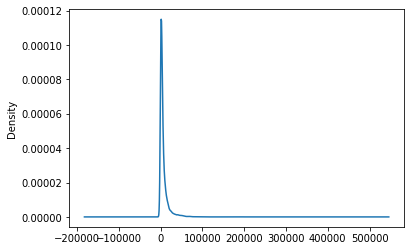

In [46]:
df_eta9050_xwa['c9'].plot.density()